<a href="https://colab.research.google.com/github/marquezjorge/456-Camo/blob/main/alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from keras import layers as l
from keras import activations as af
import matplotlib.pyplot as plt
import tensorboard
import datetime, os

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataAugmentation = keras.Sequential([l.RandomFlip("horizontal"), l.RandomContrast(factor=0.4), l.RandomRotation(0.33)])

In [ ]:
trainDir = "/content/drive/MyDrive/dataset/train"
validateDir = "/content/drive/MyDrive/dataset/validate"
testDir = "/content/drive/MyDrive/dataset/test"

Found 3000 files belonging to 3 classes.


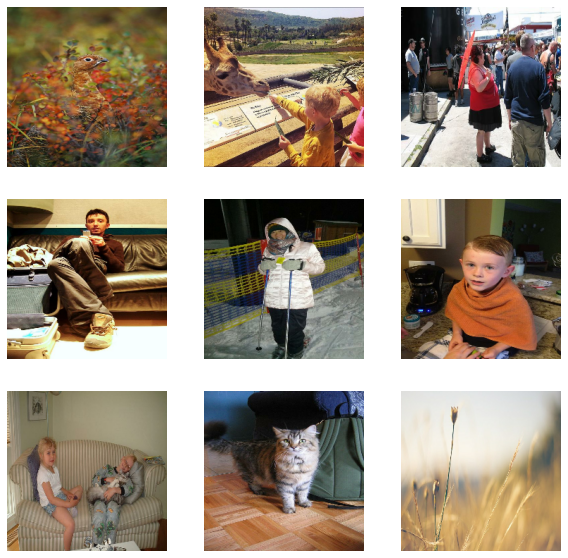

In [ ]:
batchSize = 24
imgHeight = 227
imgWidth = 227

# loads images into 'train' and creates a semi-processed dataset
train = tf.keras.utils.image_dataset_from_directory(trainDir,
                                                 labels="inferred",
                                                 label_mode="int",
                                                 color_mode="rgb",
                                                 shuffle=True,
                                                 batch_size=batchSize,
                                                 image_size=(imgHeight, imgWidth))
 
 # visualizing data prior to augmentation                                        
plt.figure(figsize=(10, 10))
for imgs, _ in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(imgs[i].numpy().astype("uint8"))
        plt.axis("off")
plt.show()

# standardizing 'train' data set, completes processing of the dataset using the dataAugmentation model
augmentedTrain = train.map(lambda x, y: (dataAugmentation(x, training=True), y))

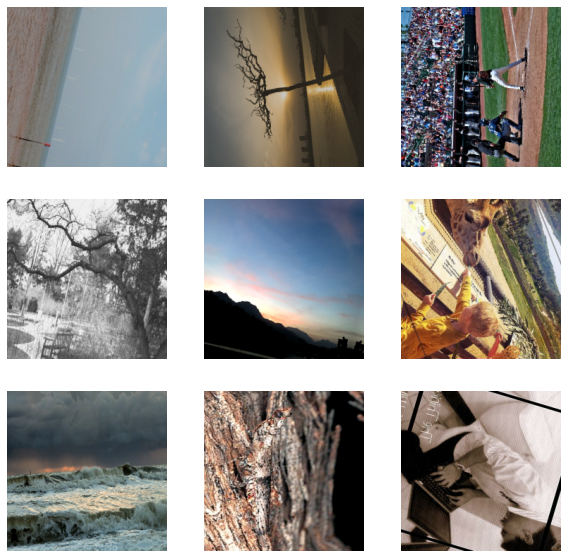

In [ ]:
# visualizing data prior after augmentation
plt.figure(figsize=(10, 10))
for imgs, _ in augmentedTrain.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(imgs[i].numpy().astype("uint8"))
        plt.axis("off")
plt.show()

In [ ]:
# loads images into 'validate' and creates a semi-processed dataset
validate = tf.keras.utils.image_dataset_from_directory(validateDir,
                                                    labels="inferred",
                                                    label_mode="int",
                                                    color_mode="rgb",
                                                    batch_size=batchSize,
                                                    image_size=(imgHeight, imgWidth))

Found 375 files belonging to 3 classes.


In [ ]:
#loads images into 'test'
test = tf.keras.utils.image_dataset_from_directory(testDir,
                                                    labels="inferred",
                                                    label_mode="int",
                                                    color_mode="rgb",
                                                    batch_size=batchSize,
                                                    image_size=(imgHeight, imgWidth))

Found 375 files belonging to 3 classes.


In [ ]:
# model architecture
numClasses = 3
inputShape = (227, 227, 3)
model = keras.Sequential(name="alexNet")
model.add(l.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation=af.relu, input_shape=inputShape,
                  padding='valid'))
model.add(l.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(l.BatchNormalization())
model.add(l.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation=af.relu, input_shape=inputShape,
                  padding='same'))
model.add(l.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(l.BatchNormalization())
model.add(l.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation=af.relu, input_shape=inputShape,
                  padding='same'))
model.add(l.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation=af.relu, input_shape=inputShape,
                  padding='same'))
model.add(l.BatchNormalization())
model.add(l.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=af.relu, input_shape=inputShape,
                  padding='same'))
model.add(l.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(l.Flatten())
model.add(l.Dense(units=4096, activation=af.relu))
model.add(l.Dense(units=4096, activation=af.relu))
model.add(l.Dense(units=1000, activation=af.relu))
model.add(l.Dense(units=numClasses, activation=af.softmax))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])
model.summary()

Model: "alexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                           

In [ ]:
# train the model
epochs = 30
history = model.fit(augmentedTrain,
                    epochs=epochs,
                    validation_data=validate)

Epoch 1/30
125/125 [==============================] - 989s 8s/step - loss: 1.0192 - accuracy: 0.5310 - val_loss: 1.0388 - val_accuracy: 0.4800
Epoch 2/30
125/125 [==============================] - 38s 303ms/step - loss: 0.8622 - accuracy: 0.6123 - val_loss: 0.8773 - val_accuracy: 0.6613
Epoch 3/30
125/125 [==============================] - 39s 303ms/step - loss: 0.8256 - accuracy: 0.6390 - val_loss: 0.7898 - val_accuracy: 0.6720
Epoch 4/30
125/125 [==============================] - 39s 304ms/step - loss: 0.7967 - accuracy: 0.6540 - val_loss: 0.8286 - val_accuracy: 0.6373
Epoch 5/30
125/125 [==============================] - 38s 302ms/step - loss: 0.7512 - accuracy: 0.6773 - val_loss: 0.8227 - val_accuracy: 0.6587
Epoch 6/30
125/125 [==============================] - 39s 303ms/step - loss: 0.7529 - accuracy: 0.6763 - val_loss: 0.9006 - val_accuracy: 0.6027
Epoch 7/30
125/125 [==============================] - 39s 304ms/step - loss: 0.7532 - accuracy: 0.6723 - val_loss: 0.7565 - val_accu

In [ ]:
# metrics
metrics = model.evaluate(test)

16/16 [==============================] - 158s 4s/step - loss: 0.6483 - accuracy: 0.7440


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


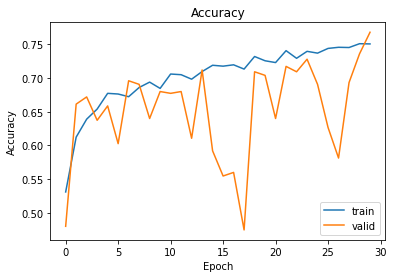

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title('Accuracy')
plt.legend(["train", "valid"], loc="lower right")
plt.show()

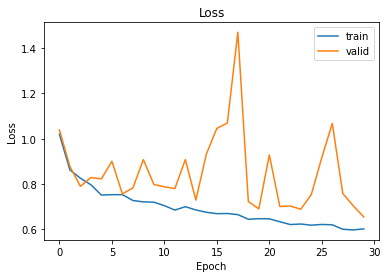

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title('Loss')
plt.legend(["train", "valid"], loc="upper right")
plt.show()